In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 33)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),45)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(45):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [7]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(45 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

16

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:648
number of class2:969

 ****** Running generation 0 ****** 

Population's average fitness: 0.51916 stdev: 0.08873
Best fitness: 0.74026 - size: (2, 13) - species 3 - id 75
Average adjusted fitness: 0.213
Mean genetic distance 2.830, standard deviation 0.470
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 5.076 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56337 stdev: 0.08830
Best fitness: 0.74026 - size: (2, 13) - species 3 - id 75
Average adjusted fitness: 0.175
Mean genetic distance 2.840, standard deviation 0.446
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 5.401 sec (5.238 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57430 stdev: 0.09143
Best fitness: 0.75448 - size: (3, 15) - species 2 - id 545
Average adjusted fitness: 0.211
Mean genetic distance 2.915, standard deviation 0.467
Population of 200 members in 21 species
Total extinctions

Population's average fitness: 0.64484 stdev: 0.09286
Best fitness: 0.78726 - size: (10, 30) - species 25 - id 2704
Average adjusted fitness: 0.237
Mean genetic distance 3.150, standard deviation 0.528
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 7.887 sec (7.565 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64897 stdev: 0.09008
Best fitness: 0.78726 - size: (10, 30) - species 25 - id 2704
Average adjusted fitness: 0.242
Mean genetic distance 3.097, standard deviation 0.539
Population of 195 members in 24 species
Total extinctions: 0
Generation time: 8.008 sec (7.603 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64569 stdev: 0.09129
Best fitness: 0.78726 - size: (10, 30) - species 25 - id 2704
Average adjusted fitness: 0.240
Mean genetic distance 3.095, standard deviation 0.544
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 7.956 sec (7.639 average)

 ***

Population's average fitness: 0.59677 stdev: 0.07560
Best fitness: 0.75263 - size: (5, 19) - species 22 - id 1164
Average adjusted fitness: 0.201
Mean genetic distance 3.258, standard deviation 0.477
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 6.952 sec (6.872 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59735 stdev: 0.07732
Best fitness: 0.75263 - size: (5, 19) - species 22 - id 1164
Average adjusted fitness: 0.185
Mean genetic distance 3.250, standard deviation 0.472
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 6.907 sec (6.925 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60669 stdev: 0.07452
Best fitness: 0.75263 - size: (5, 19) - species 22 - id 1164
Average adjusted fitness: 0.170
Mean genetic distance 3.235, standard deviation 0.468
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 6.938 sec (6.989 average)

 ******

Population of 206 members in 34 species
Total extinctions: 0
Generation time: 6.716 sec (5.988 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56662 stdev: 0.05729
Best fitness: 0.68955 - size: (4, 16) - species 25 - id 598
Average adjusted fitness: 0.123
Mean genetic distance 3.184, standard deviation 0.505
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 6.875 sec (6.099 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56511 stdev: 0.05896
Best fitness: 0.68955 - size: (4, 16) - species 25 - id 598
Average adjusted fitness: 0.147
Mean genetic distance 3.198, standard deviation 0.479
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 7.007 sec (6.200 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.56869 stdev: 0.05827
Best fitness: 0.68955 - size: (4, 16) - species 25 - id 598
Average adjusted fitness: 0.109
Mean genetic distance 3.204,

Mean genetic distance 3.331, standard deviation 0.519
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 8.652 sec (8.974 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.60979 stdev: 0.07089
Best fitness: 0.72975 - size: (9, 26) - species 26 - id 3019
Average adjusted fitness: 0.248
Mean genetic distance 3.329, standard deviation 0.510
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 10.915 sec (9.280 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.60197 stdev: 0.07302
Best fitness: 0.72975 - size: (9, 26) - species 26 - id 3019
Average adjusted fitness: 0.174
Mean genetic distance 3.330, standard deviation 0.511
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 13.042 sec (9.788 average)
number of class1:807
number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.50480 stdev: 0.04833
Best fitness: 0.65

Mean genetic distance 3.179, standard deviation 0.501
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 7.356 sec (8.250 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61515 stdev: 0.08356
Best fitness: 0.76005 - size: (4, 16) - species 22 - id 3215
Average adjusted fitness: 0.213
Mean genetic distance 3.174, standard deviation 0.503
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 7.434 sec (7.995 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60578 stdev: 0.09095
Best fitness: 0.76005 - size: (4, 16) - species 22 - id 3215
Average adjusted fitness: 0.310
Mean genetic distance 3.209, standard deviation 0.508
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 7.803 sec (8.081 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.61018 stdev: 0.08678
Best fitness: 0.76005 - size: (4, 16) - species 22 - id 3215


Population of 204 members in 28 species
Total extinctions: 0
Generation time: 7.457 sec (7.239 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60694 stdev: 0.08423
Best fitness: 0.76809 - size: (4, 16) - species 13 - id 2012
Average adjusted fitness: 0.183
Mean genetic distance 3.046, standard deviation 0.519
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 8.305 sec (7.445 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60237 stdev: 0.08775
Best fitness: 0.76933 - size: (4, 17) - species 13 - id 2317
Average adjusted fitness: 0.216
Mean genetic distance 3.077, standard deviation 0.508
Population of 207 members in 29 species
Total extinctions: 0
Generation time: 7.135 sec (7.494 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60100 stdev: 0.08761
Best fitness: 0.76933 - size: (4, 17) - species 13 - id 2317
Average adjusted fitness: 0.141
Mean genetic distance 

Mean genetic distance 3.114, standard deviation 0.491
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.881 sec (6.191 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56674 stdev: 0.09249
Best fitness: 0.73222 - size: (2, 13) - species 25 - id 42
Average adjusted fitness: 0.193
Mean genetic distance 3.142, standard deviation 0.508
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 8.667 sec (6.686 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57801 stdev: 0.09511
Best fitness: 0.75572 - size: (3, 14) - species 9 - id 948
Average adjusted fitness: 0.225
Mean genetic distance 3.178, standard deviation 0.522
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 6.838 sec (6.711 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58837 stdev: 0.09365
Best fitness: 0.76314 - size: (3, 15) - species 38 - id 1086
Average

Mean genetic distance 3.342, standard deviation 0.525
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 8.756 sec (9.049 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.64518 stdev: 0.10544
Best fitness: 0.80087 - size: (6, 22) - species 1 - id 2056
Average adjusted fitness: 0.302
Mean genetic distance 3.363, standard deviation 0.523
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 8.994 sec (9.003 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.63817 stdev: 0.10261
Best fitness: 0.80087 - size: (6, 22) - species 1 - id 2056
Average adjusted fitness: 0.252
Mean genetic distance 3.365, standard deviation 0.527
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 11.337 sec (9.119 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.63465 stdev: 0.10602
Best fitness: 0.80087 - size: (6, 22) - species 1 - id 2056
Av

Mean genetic distance 3.186, standard deviation 0.484
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.745 sec (7.526 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63940 stdev: 0.09533
Best fitness: 0.79035 - size: (6, 19) - species 20 - id 2201
Average adjusted fitness: 0.356
Mean genetic distance 3.204, standard deviation 0.487
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 8.386 sec (7.589 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63724 stdev: 0.09628
Best fitness: 0.79283 - size: (9, 23) - species 11 - id 2854
Average adjusted fitness: 0.210
Mean genetic distance 3.185, standard deviation 0.484
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 8.222 sec (7.696 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.62801 stdev: 0.09770
Best fitness: 0.79283 - size: (9, 23) - species 11 - id 2854


Mean genetic distance 3.144, standard deviation 0.495
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 8.839 sec (7.142 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.69026 stdev: 0.11480
Best fitness: 0.83364 - size: (5, 19) - species 34 - id 1314
Average adjusted fitness: 0.407
Mean genetic distance 3.200, standard deviation 0.489
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 7.500 sec (7.340 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.67239 stdev: 0.12526
Best fitness: 0.83364 - size: (5, 19) - species 34 - id 1314
Average adjusted fitness: 0.364
Mean genetic distance 3.247, standard deviation 0.486
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 7.435 sec (7.500 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.69082 stdev: 0.10375
Best fitness: 0.83364 - size: (5, 19) - species 34 - id 1314


Population's average fitness: 0.52241 stdev: 0.05935
Best fitness: 0.73098 - size: (3, 15) - species 18 - id 333
Average adjusted fitness: 0.164
Mean genetic distance 2.985, standard deviation 0.506
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 6.164 sec (6.239 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54920 stdev: 0.06494
Best fitness: 0.73098 - size: (3, 15) - species 18 - id 333
Average adjusted fitness: 0.175
Mean genetic distance 2.996, standard deviation 0.502
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.431 sec (6.636 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55317 stdev: 0.06960
Best fitness: 0.73098 - size: (3, 15) - species 18 - id 333
Average adjusted fitness: 0.168
Mean genetic distance 3.095, standard deviation 0.495
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.034 sec (6.736 average)

 ****** Runn

Population's average fitness: 0.61170 stdev: 0.07371
Best fitness: 0.75448 - size: (6, 22) - species 18 - id 1104
Average adjusted fitness: 0.179
Mean genetic distance 3.332, standard deviation 0.515
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 8.224 sec (7.870 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60868 stdev: 0.07719
Best fitness: 0.75448 - size: (6, 22) - species 18 - id 1104
Average adjusted fitness: 0.237
Mean genetic distance 3.354, standard deviation 0.527
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 8.921 sec (8.015 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.60384 stdev: 0.08199
Best fitness: 0.75448 - size: (6, 22) - species 18 - id 1104
Average adjusted fitness: 0.252
Mean genetic distance 3.355, standard deviation 0.517
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 8.446 sec (8.118 average)

 ******

Population's average fitness: 0.63784 stdev: 0.10205
Best fitness: 0.79901 - size: (5, 22) - species 22 - id 1481
Average adjusted fitness: 0.284
Mean genetic distance 3.163, standard deviation 0.464
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 7.786 sec (7.246 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64403 stdev: 0.10074
Best fitness: 0.79901 - size: (5, 22) - species 22 - id 1481
Average adjusted fitness: 0.251
Mean genetic distance 3.152, standard deviation 0.486
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 8.491 sec (7.421 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64240 stdev: 0.09912
Best fitness: 0.79901 - size: (5, 22) - species 22 - id 1481
Average adjusted fitness: 0.260
Mean genetic distance 3.159, standard deviation 0.497
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 8.625 sec (7.598 average)

 ******

Population's average fitness: 0.63167 stdev: 0.10158
Best fitness: 0.82870 - size: (5, 20) - species 19 - id 988
Average adjusted fitness: 0.316
Mean genetic distance 3.183, standard deviation 0.488
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.551 sec (7.518 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63634 stdev: 0.10132
Best fitness: 0.82870 - size: (5, 20) - species 19 - id 988
Average adjusted fitness: 0.302
Mean genetic distance 3.165, standard deviation 0.480
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 7.383 sec (7.503 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65035 stdev: 0.09775
Best fitness: 0.82870 - size: (5, 20) - species 19 - id 988
Average adjusted fitness: 0.283
Mean genetic distance 3.162, standard deviation 0.489
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 8.089 sec (7.562 average)

 ****** Runn

Population's average fitness: 0.66641 stdev: 0.11538
Best fitness: 0.86147 - size: (10, 28) - species 24 - id 4076
Average adjusted fitness: 0.343
Mean genetic distance 3.240, standard deviation 0.521
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 8.953 sec (8.556 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.67525 stdev: 0.11302
Best fitness: 0.86147 - size: (10, 28) - species 24 - id 4076
Average adjusted fitness: 0.385
Mean genetic distance 3.235, standard deviation 0.507
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 8.779 sec (8.604 average)
number of class1:488
number of class2:1129

 ****** Running generation 0 ****** 

Population's average fitness: 0.55021 stdev: 0.15371
Best fitness: 0.84477 - size: (2, 13) - species 4 - id 90
Average adjusted fitness: 0.351
Mean genetic distance 2.881, standard deviation 0.468
Population of 200 members in 23 species
Total extinctions: 0
Generation

Population's average fitness: 0.70878 stdev: 0.14416
Best fitness: 0.88559 - size: (3, 16) - species 4 - id 1896
Average adjusted fitness: 0.427
Mean genetic distance 3.186, standard deviation 0.526
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 7.938 sec (8.014 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.71550 stdev: 0.13500
Best fitness: 0.88559 - size: (3, 16) - species 4 - id 1896
Average adjusted fitness: 0.414
Mean genetic distance 3.203, standard deviation 0.525
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 7.876 sec (8.060 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.70174 stdev: 0.15280
Best fitness: 0.88559 - size: (3, 16) - species 4 - id 1896
Average adjusted fitness: 0.439
Mean genetic distance 3.188, standard deviation 0.508
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 8.267 sec (8.123 average)

 ****** Ru

Population's average fitness: 0.66218 stdev: 0.11762
Best fitness: 0.77922 - size: (3, 16) - species 15 - id 1944
Average adjusted fitness: 0.383
Mean genetic distance 3.173, standard deviation 0.488
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 7.018 sec (7.138 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.67149 stdev: 0.11821
Best fitness: 0.79530 - size: (6, 19) - species 23 - id 2188
Average adjusted fitness: 0.394
Mean genetic distance 3.196, standard deviation 0.478
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 7.388 sec (7.214 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.67289 stdev: 0.11850
Best fitness: 0.79530 - size: (6, 19) - species 23 - id 2188
Average adjusted fitness: 0.416
Mean genetic distance 3.207, standard deviation 0.474
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.983 sec (7.316 average)

 ******

Mean genetic distance 3.044, standard deviation 0.464
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.448 sec (7.289 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58463 stdev: 0.09148
Best fitness: 0.72356 - size: (5, 18) - species 26 - id 944
Average adjusted fitness: 0.237
Mean genetic distance 3.054, standard deviation 0.466
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 8.942 sec (7.564 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60176 stdev: 0.08049
Best fitness: 0.76994 - size: (3, 16) - species 1 - id 1084
Average adjusted fitness: 0.242
Mean genetic distance 3.104, standard deviation 0.466
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 8.476 sec (7.695 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60863 stdev: 0.08280
Best fitness: 0.76994 - size: (3, 16) - species 1 - id 1084
Averag

Mean genetic distance 3.196, standard deviation 0.546
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 8.581 sec (8.344 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61788 stdev: 0.10507
Best fitness: 0.78355 - size: (9, 26) - species 26 - id 4329
Average adjusted fitness: 0.234
Mean genetic distance 3.205, standard deviation 0.552
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 8.750 sec (8.406 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.61397 stdev: 0.10543
Best fitness: 0.78355 - size: (9, 26) - species 26 - id 4329
Average adjusted fitness: 0.226
Mean genetic distance 3.221, standard deviation 0.550
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 8.650 sec (8.492 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.61825 stdev: 0.10709
Best fitness: 0.78355 - size: (9, 26) - species 39 - id 4329


Mean genetic distance 3.206, standard deviation 0.481
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 7.444 sec (7.670 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63925 stdev: 0.10348
Best fitness: 0.80829 - size: (9, 30) - species 33 - id 2891
Average adjusted fitness: 0.244
Mean genetic distance 3.208, standard deviation 0.497
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 7.909 sec (7.708 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.63258 stdev: 0.10985
Best fitness: 0.80829 - size: (9, 30) - species 33 - id 2891
Average adjusted fitness: 0.303
Mean genetic distance 3.208, standard deviation 0.493
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.869 sec (7.748 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.63707 stdev: 0.10466
Best fitness: 0.80829 - size: (9, 30) - species 33 - id 2891


Population of 198 members in 34 species
Total extinctions: 0
Generation time: 7.041 sec (6.540 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60824 stdev: 0.07015
Best fitness: 0.73779 - size: (5, 18) - species 5 - id 1768
Average adjusted fitness: 0.267
Mean genetic distance 3.129, standard deviation 0.522
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.902 sec (6.657 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60084 stdev: 0.08097
Best fitness: 0.73779 - size: (5, 18) - species 5 - id 1768
Average adjusted fitness: 0.234
Mean genetic distance 3.128, standard deviation 0.522
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 7.008 sec (6.742 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60564 stdev: 0.07705
Best fitness: 0.73779 - size: (5, 18) - species 5 - id 1768
Average adjusted fitness: 0.206
Mean genetic distance 3.1

Generation time: 5.773 sec (5.579 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67334 stdev: 0.18691
Best fitness: 0.85776 - size: (3, 15) - species 1 - id 324
Average adjusted fitness: 0.464
Mean genetic distance 3.001, standard deviation 0.451
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.216 sec (5.791 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.67824 stdev: 0.18376
Best fitness: 0.86889 - size: (4, 16) - species 4 - id 645
Average adjusted fitness: 0.470
Mean genetic distance 3.034, standard deviation 0.462
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 6.417 sec (5.948 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.68603 stdev: 0.18387
Best fitness: 0.86889 - size: (4, 16) - species 4 - id 645
Average adjusted fitness: 0.480
Mean genetic distance 3.066, standard deviation 0.488
Population of 197 members in 37 specie

Total extinctions: 0
Generation time: 7.679 sec (7.348 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.71126 stdev: 0.19729
Best fitness: 0.90847 - size: (8, 24) - species 38 - id 3104
Average adjusted fitness: 0.518
Mean genetic distance 3.183, standard deviation 0.532
Population of 204 members in 24 species
Total extinctions: 0
Generation time: 7.491 sec (7.303 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.72936 stdev: 0.17892
Best fitness: 0.90847 - size: (8, 24) - species 38 - id 3104
Average adjusted fitness: 0.512
Mean genetic distance 3.203, standard deviation 0.523
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 8.029 sec (7.395 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.72699 stdev: 0.19588
Best fitness: 0.90847 - size: (8, 24) - species 38 - id 3104
Average adjusted fitness: 0.506
Mean genetic distance 3.212, standard deviation 0.527
Populati

Population's average fitness: 0.61815 stdev: 0.09977
Best fitness: 0.77922 - size: (8, 22) - species 30 - id 2374
Average adjusted fitness: 0.280
Mean genetic distance 3.134, standard deviation 0.501
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.580 sec (7.215 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62407 stdev: 0.10192
Best fitness: 0.79901 - size: (8, 24) - species 30 - id 2636
Average adjusted fitness: 0.281
Mean genetic distance 3.160, standard deviation 0.497
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 7.671 sec (7.294 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63037 stdev: 0.09371
Best fitness: 0.79901 - size: (8, 24) - species 30 - id 2636
Average adjusted fitness: 0.236
Mean genetic distance 3.165, standard deviation 0.503
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 7.738 sec (7.369 average)

 ******

Mean genetic distance 3.189, standard deviation 0.519
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 6.735 sec (6.313 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64672 stdev: 0.11846
Best fitness: 0.77984 - size: (4, 17) - species 21 - id 1513
Average adjusted fitness: 0.342
Mean genetic distance 3.218, standard deviation 0.518
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 7.139 sec (6.395 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63332 stdev: 0.13413
Best fitness: 0.77984 - size: (4, 17) - species 21 - id 1513
Average adjusted fitness: 0.338
Mean genetic distance 3.252, standard deviation 0.527
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 7.242 sec (6.579 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64176 stdev: 0.12480
Best fitness: 0.77984 - size: (4, 17) - species 21 - id 1513
A

Mean genetic distance 3.205, standard deviation 0.506
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 8.998 sec (8.667 average)
number of class1:1137
number of class2:480

 ****** Running generation 0 ****** 

Population's average fitness: 0.45469 stdev: 0.15420
Best fitness: 0.77365 - size: (2, 13) - species 2 - id 141
Average adjusted fitness: 0.186
Mean genetic distance 2.937, standard deviation 0.514
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 5.789 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55510 stdev: 0.15172
Best fitness: 0.78973 - size: (3, 14) - species 8 - id 245
Average adjusted fitness: 0.279
Mean genetic distance 3.053, standard deviation 0.547
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 5.866 sec (5.828 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58932 stdev: 0.14823
Best fitness: 0.82004 - size: (4, 15) - s

Mean genetic distance 3.229, standard deviation 0.494
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 7.318 sec (7.641 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.68268 stdev: 0.13018
Best fitness: 0.85900 - size: (6, 21) - species 19 - id 3022
Average adjusted fitness: 0.381
Mean genetic distance 3.207, standard deviation 0.515
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 7.483 sec (7.622 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66477 stdev: 0.14915
Best fitness: 0.85900 - size: (6, 21) - species 19 - id 3022
Average adjusted fitness: 0.420
Mean genetic distance 3.228, standard deviation 0.533
Population of 191 members in 27 species
Total extinctions: 0
Generation time: 7.472 sec (7.565 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.67274 stdev: 0.14629
Best fitness: 0.85900 - size: (6, 21) - species 19 - id 3022


Mean genetic distance 3.219, standard deviation 0.479
Population of 197 members in 47 species
Total extinctions: 0
Generation time: 6.493 sec (6.397 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60292 stdev: 0.07546
Best fitness: 0.76562 - size: (6, 20) - species 40 - id 1764
Average adjusted fitness: 0.166
Mean genetic distance 3.220, standard deviation 0.473
Population of 195 members in 47 species
Total extinctions: 0
Generation time: 6.542 sec (6.444 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60287 stdev: 0.07583
Best fitness: 0.76562 - size: (6, 20) - species 40 - id 1764
Average adjusted fitness: 0.195
Mean genetic distance 3.234, standard deviation 0.479
Population of 208 members in 47 species
Total extinctions: 0
Generation time: 6.558 sec (6.495 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59788 stdev: 0.07683
Best fitness: 0.76562 - size: (6, 20) - species 40 - id 1764


Population of 204 members in 38 species
Total extinctions: 0
Generation time: 6.076 sec (5.618 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64216 stdev: 0.12962
Best fitness: 0.82808 - size: (3, 14) - species 7 - id 289
Average adjusted fitness: 0.342
Mean genetic distance 3.146, standard deviation 0.503
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 6.180 sec (5.698 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63472 stdev: 0.13769
Best fitness: 0.82808 - size: (3, 14) - species 7 - id 289
Average adjusted fitness: 0.355
Mean genetic distance 3.162, standard deviation 0.477
Population of 206 members in 43 species
Total extinctions: 0
Generation time: 6.138 sec (5.753 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63799 stdev: 0.13438
Best fitness: 0.82808 - size: (3, 14) - species 7 - id 289
Average adjusted fitness: 0.340
Mean genetic distance 3.207, st

Population's average fitness: 0.68693 stdev: 0.10648
Best fitness: 0.82808 - size: (3, 14) - species 7 - id 289
Average adjusted fitness: 0.396
Mean genetic distance 3.219, standard deviation 0.507
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 7.878 sec (7.565 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.66335 stdev: 0.13729
Best fitness: 0.82808 - size: (3, 14) - species 7 - id 289
Average adjusted fitness: 0.403
Mean genetic distance 3.194, standard deviation 0.521
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 7.536 sec (7.627 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.65857 stdev: 0.13656
Best fitness: 0.82808 - size: (3, 14) - species 7 - id 289
Average adjusted fitness: 0.367
Mean genetic distance 3.164, standard deviation 0.511
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 7.496 sec (7.538 average)
number of clas


Population's average fitness: 0.60504 stdev: 0.09033
Best fitness: 0.73655 - size: (5, 18) - species 26 - id 1702
Average adjusted fitness: 0.301
Mean genetic distance 3.188, standard deviation 0.482
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 6.561 sec (6.547 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60748 stdev: 0.08410
Best fitness: 0.73655 - size: (5, 18) - species 26 - id 1702
Average adjusted fitness: 0.232
Mean genetic distance 3.198, standard deviation 0.483
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 6.598 sec (6.585 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.61380 stdev: 0.08828
Best fitness: 0.73779 - size: (6, 20) - species 26 - id 3617
Average adjusted fitness: 0.236
Mean genetic distance 3.191, standard deviation 0.500
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 6.825 sec (6.626 average)

 *****

Mean genetic distance 3.263, standard deviation 0.491
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 6.647 sec (6.332 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60507 stdev: 0.10630
Best fitness: 0.77675 - size: (5, 18) - species 33 - id 1759
Average adjusted fitness: 0.302
Mean genetic distance 3.255, standard deviation 0.492
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 6.818 sec (6.417 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61929 stdev: 0.09436
Best fitness: 0.77675 - size: (5, 18) - species 33 - id 1759
Average adjusted fitness: 0.258
Mean genetic distance 3.252, standard deviation 0.496
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 6.697 sec (6.503 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62945 stdev: 0.08930
Best fitness: 0.77675 - size: (5, 18) - species 33 - id 1759


Total extinctions: 0
Generation time: 6.041 sec (5.511 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62332 stdev: 0.13391
Best fitness: 0.78108 - size: (4, 17) - species 14 - id 997
Average adjusted fitness: 0.333
Mean genetic distance 3.094, standard deviation 0.537
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 5.930 sec (5.581 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62694 stdev: 0.13454
Best fitness: 0.78108 - size: (4, 17) - species 14 - id 997
Average adjusted fitness: 0.361
Mean genetic distance 3.120, standard deviation 0.515
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 6.204 sec (5.670 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62336 stdev: 0.13525
Best fitness: 0.78108 - size: (4, 17) - species 14 - id 997
Average adjusted fitness: 0.340
Mean genetic distance 3.131, standard deviation 0.529
Population of 

Total extinctions: 0
Generation time: 7.237 sec (6.949 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.62961 stdev: 0.15092
Best fitness: 0.79839 - size: (5, 21) - species 18 - id 3542
Average adjusted fitness: 0.338
Mean genetic distance 3.153, standard deviation 0.532
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 7.194 sec (6.990 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.63215 stdev: 0.14809
Best fitness: 0.79839 - size: (5, 21) - species 18 - id 3542
Average adjusted fitness: 0.360
Mean genetic distance 3.161, standard deviation 0.527
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 7.295 sec (7.036 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.63939 stdev: 0.14061
Best fitness: 0.79839 - size: (5, 21) - species 18 - id 3542
Average adjusted fitness: 0.351
Mean genetic distance 3.157, standard deviation 0.523
Populati


Population's average fitness: 0.64821 stdev: 0.11336
Best fitness: 0.82808 - size: (4, 17) - species 4 - id 1015
Average adjusted fitness: 0.269
Mean genetic distance 3.154, standard deviation 0.508
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 6.346 sec (6.216 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.66521 stdev: 0.10426
Best fitness: 0.82808 - size: (4, 17) - species 4 - id 1015
Average adjusted fitness: 0.229
Mean genetic distance 3.162, standard deviation 0.498
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 6.416 sec (6.252 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64827 stdev: 0.10626
Best fitness: 0.82808 - size: (4, 17) - species 4 - id 1015
Average adjusted fitness: 0.279
Mean genetic distance 3.147, standard deviation 0.500
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 6.711 sec (6.293 average)

 ****** R

Population's average fitness: 0.66387 stdev: 0.11949
Best fitness: 0.80891 - size: (4, 14) - species 3 - id 1153
Average adjusted fitness: 0.377
Mean genetic distance 3.115, standard deviation 0.473
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.041 sec (5.731 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.66622 stdev: 0.12336
Best fitness: 0.80891 - size: (4, 14) - species 3 - id 1153
Average adjusted fitness: 0.359
Mean genetic distance 3.103, standard deviation 0.456
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.179 sec (5.823 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66749 stdev: 0.11890
Best fitness: 0.80891 - size: (4, 14) - species 3 - id 1153
Average adjusted fitness: 0.359
Mean genetic distance 3.113, standard deviation 0.466
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 6.190 sec (5.884 average)

 ****** Ru

Population's average fitness: 0.63528 stdev: 0.18937
Best fitness: 0.83921 - size: (3, 14) - species 17 - id 423
Average adjusted fitness: 0.444
Mean genetic distance 2.975, standard deviation 0.500
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 5.212 sec (4.952 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.66770 stdev: 0.18470
Best fitness: 0.83921 - size: (3, 14) - species 17 - id 423
Average adjusted fitness: 0.477
Mean genetic distance 3.031, standard deviation 0.493
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 5.450 sec (5.077 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.66677 stdev: 0.19330
Best fitness: 0.83921 - size: (3, 14) - species 17 - id 423
Average adjusted fitness: 0.479
Mean genetic distance 3.085, standard deviation 0.511
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 5.627 sec (5.187 average)

 ****** Runn

Population's average fitness: 0.71162 stdev: 0.17741
Best fitness: 0.86333 - size: (9, 24) - species 13 - id 3413
Average adjusted fitness: 0.520
Mean genetic distance 3.194, standard deviation 0.517
Population of 193 members in 23 species
Total extinctions: 0
Generation time: 6.650 sec (6.577 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.70175 stdev: 0.18653
Best fitness: 0.86333 - size: (9, 24) - species 13 - id 3413
Average adjusted fitness: 0.501
Mean genetic distance 3.206, standard deviation 0.524
Population of 195 members in 24 species
Total extinctions: 0
Generation time: 6.839 sec (6.647 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.70183 stdev: 0.18245
Best fitness: 0.86333 - size: (9, 24) - species 13 - id 3413
Average adjusted fitness: 0.497
Mean genetic distance 3.198, standard deviation 0.519
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 6.858 sec (6.693 average)

 ******

Mean genetic distance 3.232, standard deviation 0.473
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 6.212 sec (6.045 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65700 stdev: 0.11386
Best fitness: 0.80396 - size: (7, 21) - species 12 - id 2045
Average adjusted fitness: 0.379
Mean genetic distance 3.216, standard deviation 0.475
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 6.337 sec (6.091 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66413 stdev: 0.10487
Best fitness: 0.80396 - size: (7, 21) - species 12 - id 2045
Average adjusted fitness: 0.360
Mean genetic distance 3.226, standard deviation 0.471
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 6.164 sec (6.122 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65688 stdev: 0.12380
Best fitness: 0.80396 - size: (7, 21) - species 12 - id 2045


Mean genetic distance 3.130, standard deviation 0.495
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 10.114 sec (7.946 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63628 stdev: 0.13333
Best fitness: 0.78417 - size: (4, 17) - species 2 - id 933
Average adjusted fitness: 0.316
Mean genetic distance 3.133, standard deviation 0.495
Population of 212 members in 43 species
Total extinctions: 0
Generation time: 10.003 sec (8.151 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63943 stdev: 0.13547
Best fitness: 0.78417 - size: (4, 17) - species 2 - id 933
Average adjusted fitness: 0.352
Mean genetic distance 3.146, standard deviation 0.494
Population of 211 members in 44 species
Total extinctions: 0
Generation time: 8.687 sec (8.535 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64002 stdev: 0.13823
Best fitness: 0.78417 - size: (4, 17) - species 2 - id 933
Avera


 ****** Running generation 0 ****** 

Population's average fitness: 0.52055 stdev: 0.08550
Best fitness: 0.67965 - size: (2, 13) - species 6 - id 130
Average adjusted fitness: 0.217
Mean genetic distance 2.859, standard deviation 0.508
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 5.231 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56969 stdev: 0.07571
Best fitness: 0.74088 - size: (2, 13) - species 5 - id 282
Average adjusted fitness: 0.227
Mean genetic distance 2.956, standard deviation 0.540
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 5.766 sec (5.499 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58286 stdev: 0.06988
Best fitness: 0.74088 - size: (2, 13) - species 5 - id 282
Average adjusted fitness: 0.214
Mean genetic distance 3.010, standard deviation 0.534
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 5.839 sec (5.612 av


Population's average fitness: 0.63443 stdev: 0.09334
Best fitness: 0.77489 - size: (4, 17) - species 19 - id 3630
Average adjusted fitness: 0.238
Mean genetic distance 3.203, standard deviation 0.562
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 6.752 sec (6.804 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63074 stdev: 0.10212
Best fitness: 0.77489 - size: (4, 17) - species 35 - id 3630
Average adjusted fitness: 0.307
Mean genetic distance 3.230, standard deviation 0.569
Population of 192 members in 23 species
Total extinctions: 0
Generation time: 7.035 sec (6.846 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64470 stdev: 0.08793
Best fitness: 0.77489 - size: (4, 17) - species 35 - id 3630
Average adjusted fitness: 0.274
Mean genetic distance 3.238, standard deviation 0.578
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 6.994 sec (6.844 average)

 *****

Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.196 sec (6.905 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59212 stdev: 0.07710
Best fitness: 0.72665 - size: (5, 18) - species 16 - id 2524
Average adjusted fitness: 0.217
Mean genetic distance 3.138, standard deviation 0.528
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 7.011 sec (6.962 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59647 stdev: 0.07241
Best fitness: 0.72665 - size: (5, 18) - species 16 - id 2524
Average adjusted fitness: 0.157
Mean genetic distance 3.169, standard deviation 0.543
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 7.258 sec (7.020 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.59965 stdev: 0.07464
Best fitness: 0.72665 - size: (5, 18) - species 16 - id 2524
Average adjusted fitness: 0.252
Mean genetic distance 

Mean genetic distance 3.211, standard deviation 0.528
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.300 sec (5.947 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.67320 stdev: 0.13807
Best fitness: 0.85529 - size: (4, 17) - species 2 - id 1117
Average adjusted fitness: 0.386
Mean genetic distance 3.222, standard deviation 0.510
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 6.452 sec (6.010 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.68138 stdev: 0.13782
Best fitness: 0.85529 - size: (4, 17) - species 2 - id 1117
Average adjusted fitness: 0.418
Mean genetic distance 3.223, standard deviation 0.506
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.478 sec (6.062 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.67579 stdev: 0.14114
Best fitness: 0.85529 - size: (4, 17) - species 2 - id 1117
Averag

Mean genetic distance 3.331, standard deviation 0.517
Population of 190 members in 26 species
Total extinctions: 0
Generation time: 7.923 sec (7.840 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.68023 stdev: 0.17043
Best fitness: 0.89054 - size: (6, 22) - species 19 - id 3789
Average adjusted fitness: 0.423
Mean genetic distance 3.330, standard deviation 0.515
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 7.802 sec (7.880 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.69885 stdev: 0.16230
Best fitness: 0.89054 - size: (6, 22) - species 19 - id 3789
Average adjusted fitness: 0.424
Mean genetic distance 3.310, standard deviation 0.512
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 8.135 sec (7.944 average)
number of class1:967
number of class2:650

 ****** Running generation 0 ****** 

Population's average fitness: 0.47903 stdev: 0.08551
Best fitness: 0.6883

Population of 195 members in 32 species
Total extinctions: 0
Generation time: 7.065 sec (7.013 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61396 stdev: 0.08498
Best fitness: 0.76500 - size: (2, 13) - species 18 - id 532
Average adjusted fitness: 0.221
Mean genetic distance 3.130, standard deviation 0.518
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 6.986 sec (7.013 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60407 stdev: 0.09644
Best fitness: 0.76500 - size: (2, 13) - species 18 - id 532
Average adjusted fitness: 0.230
Mean genetic distance 3.152, standard deviation 0.507
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 7.252 sec (7.057 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.60507 stdev: 0.09647
Best fitness: 0.76500 - size: (2, 13) - species 18 - id 532
Average adjusted fitness: 0.224
Mean genetic distance 3.1

Population's average fitness: 0.60820 stdev: 0.10472
Best fitness: 0.77613 - size: (6, 20) - species 4 - id 1966
Average adjusted fitness: 0.316
Mean genetic distance 3.189, standard deviation 0.504
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 7.112 sec (6.939 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61728 stdev: 0.09562
Best fitness: 0.77613 - size: (6, 20) - species 4 - id 1966
Average adjusted fitness: 0.232
Mean genetic distance 3.152, standard deviation 0.515
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 7.275 sec (6.938 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62130 stdev: 0.09793
Best fitness: 0.77613 - size: (6, 20) - species 4 - id 1966
Average adjusted fitness: 0.241
Mean genetic distance 3.184, standard deviation 0.500
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 7.279 sec (6.987 average)

 ****** Ru


 ****** Running generation 5 ****** 

Population's average fitness: 0.76714 stdev: 0.22845
Best fitness: 0.95300 - size: (2, 13) - species 4 - id 76
Average adjusted fitness: 0.649
Mean genetic distance 3.009, standard deviation 0.485
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 6.079 sec (5.927 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.77001 stdev: 0.22340
Best fitness: 0.95300 - size: (2, 13) - species 4 - id 76
Average adjusted fitness: 0.643
Mean genetic distance 3.028, standard deviation 0.480
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 6.590 sec (6.021 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.76537 stdev: 0.24013
Best fitness: 0.95300 - size: (2, 13) - species 4 - id 76
Average adjusted fitness: 0.644
Mean genetic distance 3.026, standard deviation 0.485
Population of 208 members in 38 species
Total extinctions: 0
Generation time: 6.236 

Population's average fitness: 0.78613 stdev: 0.23075
Best fitness: 0.96784 - size: (2, 14) - species 24 - id 4098
Average adjusted fitness: 0.687
Mean genetic distance 3.279, standard deviation 0.570
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 7.563 sec (7.335 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.78617 stdev: 0.22368
Best fitness: 0.96784 - size: (2, 14) - species 24 - id 4098
Average adjusted fitness: 0.679
Mean genetic distance 3.293, standard deviation 0.589
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 7.706 sec (7.386 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.76425 stdev: 0.23758
Best fitness: 0.96784 - size: (2, 14) - species 24 - id 4098
Average adjusted fitness: 0.658
Mean genetic distance 3.298, standard deviation 0.591
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 7.805 sec (7.458 average)
number o

Mean genetic distance 3.204, standard deviation 0.510
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 7.765 sec (7.440 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.67237 stdev: 0.11394
Best fitness: 0.84848 - size: (11, 31) - species 28 - id 2722
Average adjusted fitness: 0.303
Mean genetic distance 3.214, standard deviation 0.516
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 8.014 sec (7.521 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.67750 stdev: 0.10471
Best fitness: 0.84848 - size: (11, 31) - species 28 - id 2722
Average adjusted fitness: 0.372
Mean genetic distance 3.228, standard deviation 0.529
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 7.650 sec (7.563 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.66727 stdev: 0.11954
Best fitness: 0.84848 - size: (11, 31) - species 28 - id 27

Population of 205 members in 35 species
Total extinctions: 0
Generation time: 7.498 sec (7.663 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.69593 stdev: 0.18366
Best fitness: 0.86395 - size: (2, 14) - species 1 - id 1001
Average adjusted fitness: 0.481
Mean genetic distance 3.149, standard deviation 0.499
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 7.628 sec (7.603 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.72369 stdev: 0.15809
Best fitness: 0.86395 - size: (2, 14) - species 1 - id 1001
Average adjusted fitness: 0.497
Mean genetic distance 3.178, standard deviation 0.511
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 7.631 sec (7.602 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.71969 stdev: 0.16389
Best fitness: 0.87446 - size: (2, 15) - species 1 - id 2419
Average adjusted fitness: 0.492
Mean genetic distance 3.1

Total extinctions: 0
Generation time: 6.190 sec (5.937 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58601 stdev: 0.09018
Best fitness: 0.77737 - size: (4, 16) - species 23 - id 670
Average adjusted fitness: 0.194
Mean genetic distance 3.096, standard deviation 0.523
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.363 sec (6.222 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60256 stdev: 0.08922
Best fitness: 0.77737 - size: (4, 16) - species 23 - id 670
Average adjusted fitness: 0.263
Mean genetic distance 3.083, standard deviation 0.523
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 6.519 sec (6.271 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60401 stdev: 0.09553
Best fitness: 0.77922 - size: (3, 16) - species 5 - id 1051
Average adjusted fitness: 0.285
Mean genetic distance 3.090, standard deviation 0.525
Population of 

Population's average fitness: 0.65409 stdev: 0.10201
Best fitness: 0.81509 - size: (8, 24) - species 8 - id 3796
Average adjusted fitness: 0.305
Mean genetic distance 3.285, standard deviation 0.528
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 8.340 sec (8.074 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.65228 stdev: 0.09922
Best fitness: 0.81509 - size: (8, 24) - species 8 - id 3796
Average adjusted fitness: 0.254
Mean genetic distance 3.319, standard deviation 0.530
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 7.888 sec (8.072 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.65141 stdev: 0.10025
Best fitness: 0.81509 - size: (8, 24) - species 8 - id 3796
Average adjusted fitness: 0.319
Mean genetic distance 3.349, standard deviation 0.523
Population of 206 members in 28 species
Total extinctions: 0
Generation time: 8.268 sec (8.140 average)

 ****** Ru

Population of 194 members in 31 species
Total extinctions: 0
Generation time: 7.470 sec (7.373 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.66471 stdev: 0.12862
Best fitness: 0.82622 - size: (5, 20) - species 11 - id 1904
Average adjusted fitness: 0.367
Mean genetic distance 3.266, standard deviation 0.480
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 7.360 sec (7.388 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.66425 stdev: 0.13366
Best fitness: 0.82622 - size: (5, 20) - species 11 - id 1904
Average adjusted fitness: 0.379
Mean genetic distance 3.305, standard deviation 0.492
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 7.671 sec (7.468 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.66280 stdev: 0.13447
Best fitness: 0.82622 - size: (5, 20) - species 11 - id 1904
Average adjusted fitness: 0.455
Mean genetic distance 

Mean genetic distance 3.135, standard deviation 0.496
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 7.154 sec (6.656 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61617 stdev: 0.09101
Best fitness: 0.76747 - size: (6, 18) - species 39 - id 1377
Average adjusted fitness: 0.269
Mean genetic distance 3.133, standard deviation 0.496
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 6.975 sec (6.764 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61358 stdev: 0.09642
Best fitness: 0.76747 - size: (6, 18) - species 39 - id 1377
Average adjusted fitness: 0.259
Mean genetic distance 3.125, standard deviation 0.492
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 7.174 sec (6.850 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62767 stdev: 0.07795
Best fitness: 0.76747 - size: (6, 18) - species 39 - id 1377


Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.062 sec (5.743 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61398 stdev: 0.14008
Best fitness: 0.80334 - size: (4, 15) - species 15 - id 435
Average adjusted fitness: 0.333
Mean genetic distance 2.925, standard deviation 0.467
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 6.235 sec (5.907 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62499 stdev: 0.14206
Best fitness: 0.81694 - size: (4, 18) - species 4 - id 665
Average adjusted fitness: 0.337
Mean genetic distance 3.000, standard deviation 0.495
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.403 sec (6.031 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62678 stdev: 0.14207
Best fitness: 0.81694 - size: (4, 18) - species 4 - id 665
Average adjusted fitness: 0.372
Mean genetic distance 3.046, s

Population's average fitness: 0.67253 stdev: 0.15356
Best fitness: 0.86024 - size: (5, 19) - species 17 - id 3308
Average adjusted fitness: 0.503
Mean genetic distance 3.316, standard deviation 0.502
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.940 sec (7.907 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.66508 stdev: 0.16026
Best fitness: 0.86024 - size: (5, 19) - species 17 - id 3308
Average adjusted fitness: 0.466
Mean genetic distance 3.296, standard deviation 0.511
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.177 sec (7.961 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.66832 stdev: 0.15603
Best fitness: 0.86024 - size: (5, 19) - species 17 - id 3308
Average adjusted fitness: 0.394
Mean genetic distance 3.297, standard deviation 0.512
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 8.136 sec (8.043 average)

 ******

Mean genetic distance 3.158, standard deviation 0.484
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 7.375 sec (7.295 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.59004 stdev: 0.06897
Best fitness: 0.72233 - size: (7, 24) - species 26 - id 2535
Average adjusted fitness: 0.169
Mean genetic distance 3.173, standard deviation 0.473
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.595 sec (7.328 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.58984 stdev: 0.06741
Best fitness: 0.72233 - size: (7, 24) - species 26 - id 2535
Average adjusted fitness: 0.175
Mean genetic distance 3.167, standard deviation 0.479
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 8.362 sec (7.454 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.59062 stdev: 0.06533
Best fitness: 0.72233 - size: (7, 24) - species 26 - id 2535


Mean genetic distance 3.087, standard deviation 0.454
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 9.468 sec (7.167 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.67256 stdev: 0.11258
Best fitness: 0.80396 - size: (4, 18) - species 17 - id 1189
Average adjusted fitness: 0.371
Mean genetic distance 3.111, standard deviation 0.461
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 10.936 sec (7.544 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67475 stdev: 0.11726
Best fitness: 0.80396 - size: (4, 18) - species 17 - id 1189
Average adjusted fitness: 0.381
Mean genetic distance 3.118, standard deviation 0.458
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 8.292 sec (7.771 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.68471 stdev: 0.10628
Best fitness: 0.80396 - size: (4, 18) - species 17 - id 1189


Mean genetic distance 3.277, standard deviation 0.486
Population of 192 members in 29 species
Total extinctions: 0
Generation time: 8.816 sec (8.189 average)
number of class1:974
number of class2:643

 ****** Running generation 0 ****** 

Population's average fitness: 0.49573 stdev: 0.09170
Best fitness: 0.68275 - size: (2, 13) - species 5 - id 47
Average adjusted fitness: 0.172
Mean genetic distance 2.884, standard deviation 0.447
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 5.413 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53093 stdev: 0.08875
Best fitness: 0.69140 - size: (3, 14) - species 20 - id 363
Average adjusted fitness: 0.221
Mean genetic distance 2.994, standard deviation 0.479
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 5.881 sec (5.647 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55051 stdev: 0.08666
Best fitness: 0.69140 - size: (3, 14) - sp

Mean genetic distance 3.161, standard deviation 0.521
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 7.249 sec (7.474 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.62300 stdev: 0.09684
Best fitness: 0.78912 - size: (9, 26) - species 19 - id 3197
Average adjusted fitness: 0.276
Mean genetic distance 3.214, standard deviation 0.512
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 7.396 sec (7.496 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61540 stdev: 0.10299
Best fitness: 0.78912 - size: (9, 26) - species 19 - id 3197
Average adjusted fitness: 0.225
Mean genetic distance 3.214, standard deviation 0.507
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 10.180 sec (7.804 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62806 stdev: 0.09427
Best fitness: 0.78912 - size: (9, 26) - species 19 - id 3197

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [13]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  4]
 [ 0 15  0  0  0  0  1  0  0  0]
 [ 0  0 16  0  0  0  1  1  1  0]
 [ 0  0  0 11  0  0  0  0  2  4]
 [ 0  0  0  0 17  0  0  2  1  0]
 [ 0  0  0  0  0 18  0  0  0  2]
 [ 0  0  0  0  0  0 16  0  1  0]
 [ 0  1  1  4  3  0  0 16  0  1]
 [ 0  3  0  3  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0  7]]


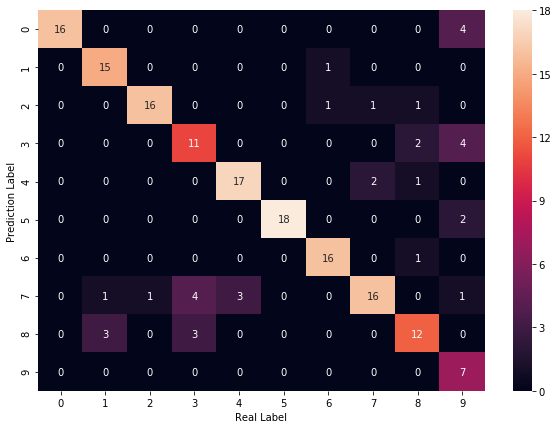

In [15]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [16]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:11 index:[5] real:5
#1 min_error:12 index:[7] real:2
#2 min_error:14 index:[8] real:8
#3 min_error:3 index:[0] real:0
#4 min_error:8 index:[1] real:1
#5 min_error:9 index:[7] real:7
#6 min_error:6 index:[6] real:6
#7 min_error:9 index:[3] real:3
#8 min_error:6 index:[2] real:2
#9 min_error:9 index:[1] real:1
#10 min_error:11 index:[2] real:7
#11 min_error:12 index:[7] real:4
#12 min_error:3 index:[6] real:6
#13 min_error:10 index:[3] real:3
#14 min_error:8 index:[1] real:1
#15 min_error:13 index:[3] real:3
#16 min_error:11 index:[7] real:9
#17 min_error:8 index:[1] real:1
#18 min_error:14 index:[7] real:7
#19 min_error:5 index:[6] real:6
#20 min_error:11 index:[8] real:8
#21 min_error:7 index:[4] real:4
#22 min_error:7 index:[3] real:3
#23 min_error:12 index:[1] real:1
#24 min_error:5 index:[4] real:4
#25 min_error:5 index:[0] real:0
#26 min_error:5 index:[5] real:5
#27 min_error:6 index:[3] real:3
#28 min_error:11 index:[1] real:6
#29 min_error:10 index:[3] real:9
#30 min

In [40]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8231292517006803
Avg Base Learner:0.8149934721363291


In [36]:
from random import randint

list_acc = []

for iii in range(45):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.06666666666666667
Accuracy on training set: 0.14444444444444443
Accuracy on training set: 0.21666666666666667
Accuracy on training set: 0.29444444444444445
Accuracy on training set: 0.37222222222222223
Accuracy on training set: 0.4777777777777778
Accuracy on training set: 0.5
Accuracy on training set: 0.5666666666666667
Accuracy on training set: 0.5666666666666667
Accuracy on training set: 0.6222222222222222
Accuracy on training set: 0.6111111111111112
Accuracy on training set: 0.6111111111111112
Accuracy on training set: 0.6111111111111112
Accuracy on training set: 0.6333333333333333
Accuracy on training set: 0.6388888888888888
Accuracy on training set: 0.6333333333333333
Accuracy on training set: 0.6222222222222222
Accuracy on training set: 0.6277777777777778
Accuracy on training set: 0.6333333333333333
Accuracy on training set: 0.65
Accuracy on training set: 0.6555555555555556
Accuracy on training set: 0.6555555555555556
Accuracy on training set: 0.661111

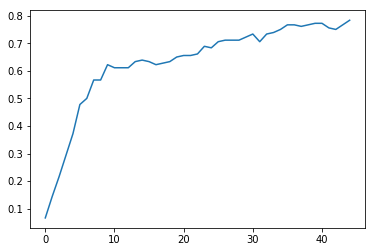

In [37]:
plt.plot(range(45),list_acc)
plt.show()

In [38]:
list_acc

[0.06666666666666667,
 0.14444444444444443,
 0.21666666666666667,
 0.29444444444444445,
 0.37222222222222223,
 0.4777777777777778,
 0.5,
 0.5666666666666667,
 0.5666666666666667,
 0.6222222222222222,
 0.6111111111111112,
 0.6111111111111112,
 0.6111111111111112,
 0.6333333333333333,
 0.6388888888888888,
 0.6333333333333333,
 0.6222222222222222,
 0.6277777777777778,
 0.6333333333333333,
 0.65,
 0.6555555555555556,
 0.6555555555555556,
 0.6611111111111111,
 0.6888888888888889,
 0.6833333333333333,
 0.7055555555555556,
 0.7111111111111111,
 0.7111111111111111,
 0.7111111111111111,
 0.7222222222222222,
 0.7333333333333333,
 0.7055555555555556,
 0.7333333333333333,
 0.7388888888888889,
 0.75,
 0.7666666666666667,
 0.7666666666666667,
 0.7611111111111111,
 0.7666666666666667,
 0.7722222222222223,
 0.7722222222222223,
 0.7555555555555555,
 0.75,
 0.7666666666666667,
 0.7833333333333333]